In [21]:
import sys
from tqdm import tqdm

import datasets_custom
from hzhu_MTL_UNet import *

import torch
from torch import nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader

# torch.backends.cudnn.enabled=False

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import os
import copy

In [2]:
use_augmentation = False

In [3]:
train_dataset, valid_dataset, test_dataset = datasets_custom.get_datasets(use_augmentation)
dataAll = {
            "Train": DataLoader(train_dataset, batch_size=8, shuffle=True),
            "Valid": DataLoader(valid_dataset, batch_size=8, shuffle=True),
            "Test": DataLoader(test_dataset, batch_size=1, shuffle=True) 
}

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MTL_UNet(in_channels = 1, out_dict = {'class': 15, 'image': 1},)
model = model.to(device)

In [4]:
classification_loss = nn.BCELoss()
seg_pred_loss = nn.KLDivLoss()

num_epochs = 100
val_check = 5
lr = 0.0002
beta1 = 0.5
optimizer = optim.Adam(model.parameters(), lr=lr, betas=(beta1, 0.999))

In [36]:
#Function for visualization
def visualize(data, pred, disease_pred):
    fig, axs = plt.subplots(1, 3, figsize=(10,10))
    img_plot = data["cxr"].detach().cpu()
    pred_plot = pred[0].detach().cpu()
    label_plot = data["gaze"].detach().cpu()
    
    axs[0].imshow(img_plot[0, 0])
    axs[0].set_title('Image')

    axs[1].imshow(pred_plot[0],cmap='gray')
    axs[1].set_title('Prediction')

    axs[2].imshow(label_plot[-1, 0],cmap='gray')
    axs[2].set_title('Label')
        
    plt.show()
    
    np.set_printoptions(precision=3)
    true = data['Y'].detach().cpu().numpy().tolist()
    pred = disease_pred.detach().cpu().numpy().tolist()

    print(f"True v/s Pred:")
    for x, y in zip(true[0], pred[0]):
        print(f'{x}\t{round(y, 3)}')

  0%|          | 0/100 [00:00<?, ?it/s]

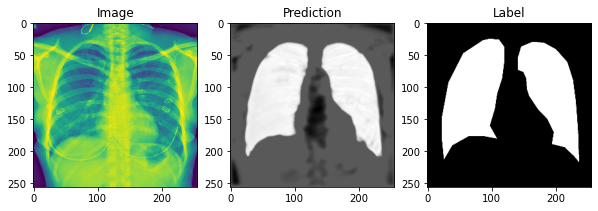

  1%|          | 1/100 [00:09<16:11,  9.81s/it]

True v/s Pred:
0	0.044
0	0.016
0	0.002
0	0.014
0	0.034
0	0.001
0	0.062
0	0.035
1	0.948
0	0.007
0	0.106
0	0.002
0	0.016
0	0.002
0	0.02
[TRAIN] Epoch : 0, Loss : -0.60066


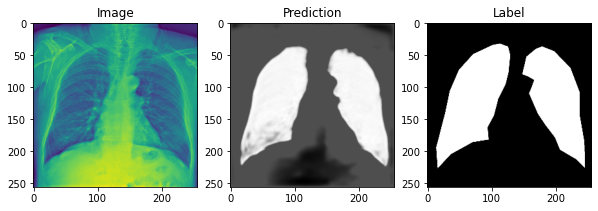

  2%|▏         | 2/100 [00:19<15:38,  9.58s/it]

True v/s Pred:
0	0.071
0	0.037
0	0.002
0	0.036
0	0.012
0	0.004
0	0.083
0	0.043
1	0.909
0	0.008
0	0.005
0	0.015
0	0.043
0	0.0
0	0.071
[TRAIN] Epoch : 1, Loss : -0.59893


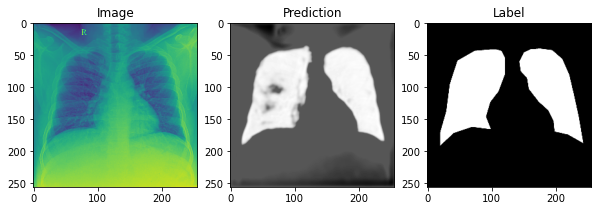

  3%|▎         | 3/100 [00:28<15:14,  9.43s/it]

True v/s Pred:
0	0.017
0	0.006
0	0.0
0	0.021
0	0.009
0	0.001
0	0.019
0	0.006
1	0.965
0	0.001
0	0.005
0	0.02
0	0.023
0	0.0
0	0.015
[TRAIN] Epoch : 2, Loss : -0.60176


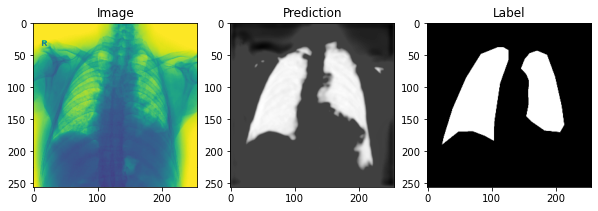

  4%|▍         | 4/100 [00:37<15:05,  9.43s/it]

True v/s Pred:
1	0.013
0	0.018
0	0.002
1	0.018
1	0.049
1	0.003
1	0.061
1	0.195
0	0.958
1	0.01
0	0.011
1	0.007
0	0.029
0	0.0
1	0.023
[TRAIN] Epoch : 3, Loss : -0.52771


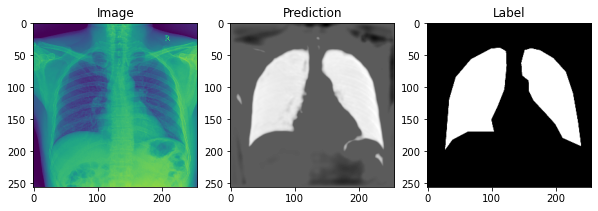

  5%|▌         | 5/100 [00:47<14:58,  9.45s/it]

True v/s Pred:
0	0.036
0	0.014
0	0.002
0	0.037
0	0.121
0	0.033
0	0.054
0	0.131
1	0.866
0	0.025
0	0.014
0	0.044
0	0.052
0	0.001
0	0.095
[TRAIN] Epoch : 4, Loss : -0.52811


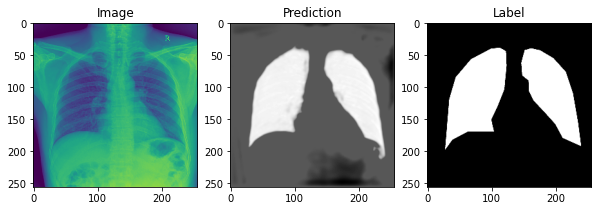

  6%|▌         | 6/100 [00:57<14:53,  9.50s/it]

True v/s Pred:
0	0.014
0	0.012
0	0.0
0	0.015
0	0.024
0	0.007
0	0.016
0	0.009
1	0.906
0	0.008
0	0.013
0	0.006
0	0.009
0	0.0
0	0.017
[TRAIN] Epoch : 5, Loss : -0.53793


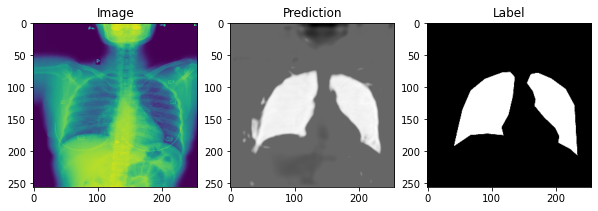

  7%|▋         | 7/100 [01:06<14:42,  9.49s/it]

True v/s Pred:
0	0.011
0	0.002
0	0.0
0	0.002
0	0.017
0	0.001
0	0.009
0	0.013
1	0.982
0	0.003
0	0.009
0	0.002
0	0.006
0	0.0
0	0.008
[TRAIN] Epoch : 6, Loss : -0.55019


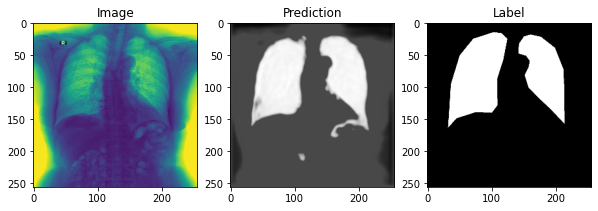

  8%|▊         | 8/100 [01:15<14:22,  9.38s/it]

True v/s Pred:
0	0.175
0	0.031
0	0.002
0	0.045
0	0.037
0	0.009
0	0.042
0	0.07
1	0.948
0	0.011
0	0.022
0	0.018
0	0.127
0	0.004
0	0.052
[TRAIN] Epoch : 7, Loss : -0.55913


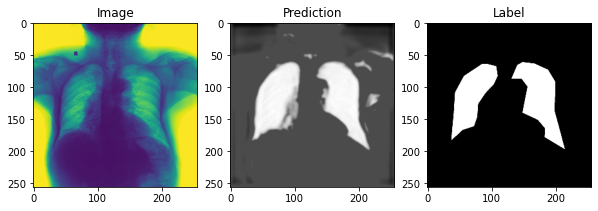

  9%|▉         | 9/100 [01:24<14:07,  9.32s/it]

True v/s Pred:
1	0.031
0	0.023
0	0.001
1	0.027
0	0.018
0	0.003
1	0.083
0	0.03
0	0.943
0	0.004
0	0.005
0	0.01
0	0.011
0	0.0
1	0.037
[TRAIN] Epoch : 8, Loss : -0.55380


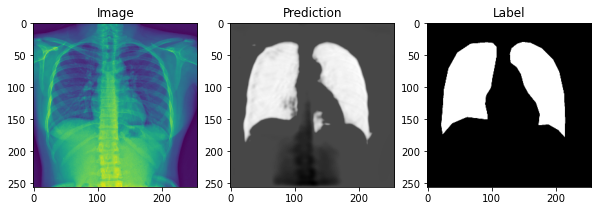

 10%|█         | 10/100 [01:33<13:52,  9.25s/it]

True v/s Pred:
0	0.002
0	0.003
0	0.002
0	0.033
0	0.189
0	0.001
0	0.038
0	0.249
1	0.941
0	0.039
0	0.042
0	0.009
0	0.054
0	0.001
0	0.054
[TRAIN] Epoch : 9, Loss : -0.56251


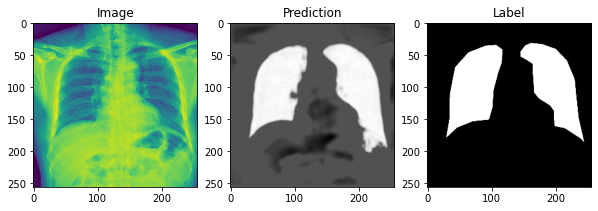

 11%|█         | 11/100 [01:42<13:28,  9.08s/it]

True v/s Pred:
0	0.151
0	0.007
0	0.0
0	0.012
0	0.01
0	0.002
0	0.002
0	0.012
1	0.981
0	0.01
0	0.011
0	0.004
0	0.004
0	0.004
0	0.068
[TRAIN] Epoch : 10, Loss : -0.57141


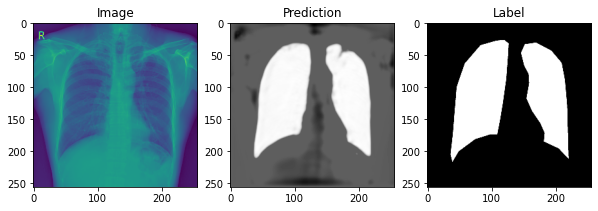

 12%|█▏        | 12/100 [01:51<13:09,  8.97s/it]

True v/s Pred:
0	0.032
0	0.007
0	0.003
0	0.022
0	0.124
0	0.01
0	0.056
0	0.311
0	0.912
0	0.006
0	0.009
0	0.017
1	0.05
0	0.001
1	0.089
[TRAIN] Epoch : 11, Loss : -0.57686


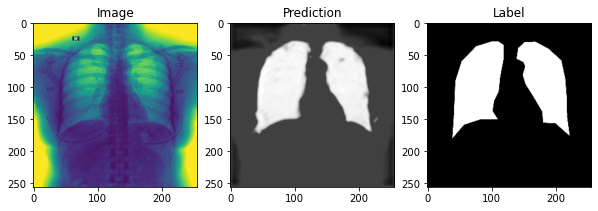

 13%|█▎        | 13/100 [02:00<13:09,  9.08s/it]

True v/s Pred:
0	0.155
0	0.023
0	0.002
0	0.028
0	0.037
0	0.007
0	0.08
0	0.049
1	0.949
0	0.011
0	0.005
0	0.029
0	0.029
0	0.005
0	0.052
[TRAIN] Epoch : 12, Loss : -0.58469


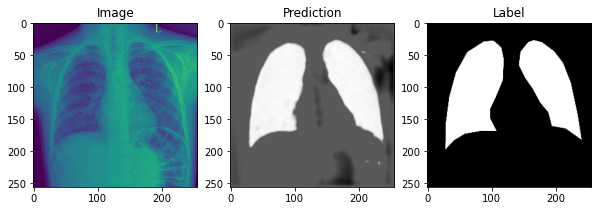

 14%|█▍        | 14/100 [02:09<12:58,  9.05s/it]

True v/s Pred:
0	0.016
0	0.001
0	0.0
0	0.01
0	0.006
0	0.003
0	0.002
0	0.011
1	0.964
0	0.001
0	0.001
0	0.007
0	0.003
0	0.0
0	0.034
[TRAIN] Epoch : 13, Loss : -0.59361


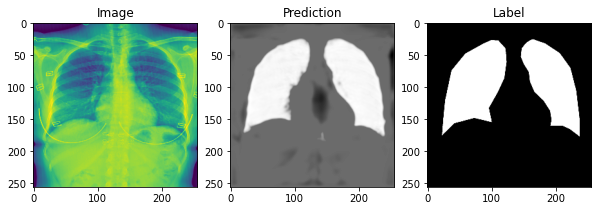

 15%|█▌        | 15/100 [02:18<12:47,  9.03s/it]

True v/s Pred:
0	0.005
0	0.001
0	0.0
0	0.012
0	0.03
0	0.0
0	0.007
0	0.034
1	0.97
0	0.006
0	0.007
0	0.001
0	0.004
0	0.0
0	0.022
[TRAIN] Epoch : 14, Loss : -0.60180


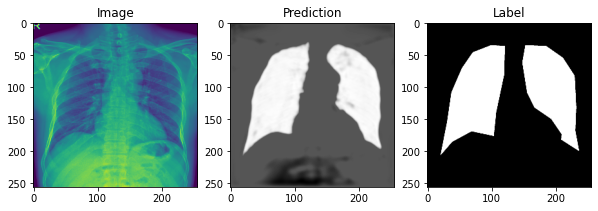

 16%|█▌        | 16/100 [02:27<12:33,  8.98s/it]

True v/s Pred:
0	0.057
0	0.005
0	0.0
0	0.006
0	0.007
0	0.002
0	0.021
0	0.004
1	0.985
0	0.004
0	0.003
0	0.004
0	0.006
0	0.001
0	0.011
[TRAIN] Epoch : 15, Loss : -0.60997


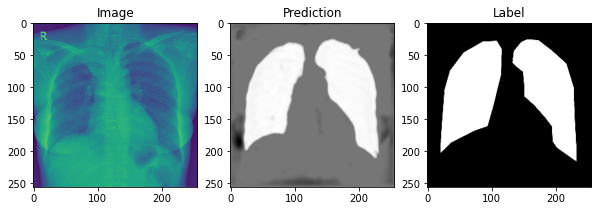

 17%|█▋        | 17/100 [02:36<12:38,  9.14s/it]

True v/s Pred:
0	0.005
1	0.004
0	0.001
1	0.064
1	0.022
0	0.002
0	0.039
0	0.049
0	0.882
1	0.001
1	0.007
0	0.041
0	0.045
0	0.001
0	0.034
[TRAIN] Epoch : 16, Loss : -0.60622


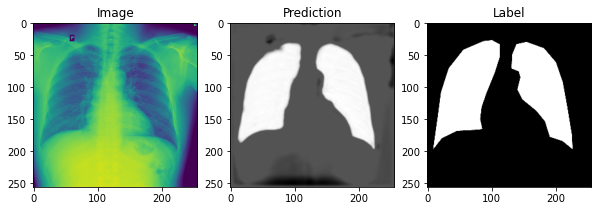

 18%|█▊        | 18/100 [02:46<12:30,  9.15s/it]

True v/s Pred:
0	0.047
0	0.005
0	0.001
0	0.055
0	0.027
0	0.011
0	0.01
0	0.055
1	0.833
0	0.008
0	0.005
0	0.025
0	0.018
0	0.001
0	0.053
[TRAIN] Epoch : 17, Loss : -0.61000


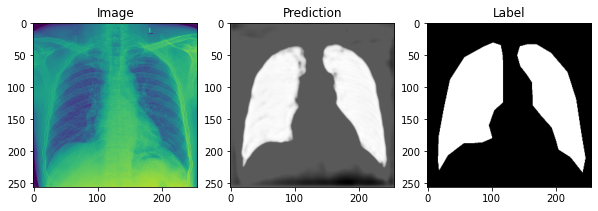

 19%|█▉        | 19/100 [02:55<12:20,  9.15s/it]

True v/s Pred:
0	0.006
0	0.002
0	0.0
0	0.005
0	0.025
0	0.002
0	0.003
0	0.011
1	0.982
0	0.02
0	0.017
0	0.001
0	0.012
0	0.0
0	0.007
[TRAIN] Epoch : 18, Loss : -0.61726


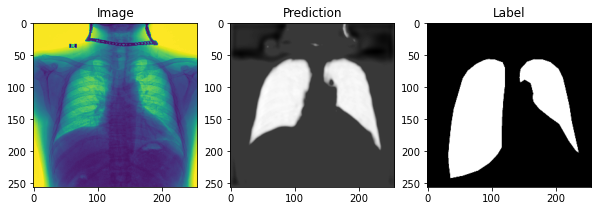

 20%|██        | 20/100 [03:04<12:13,  9.17s/it]

True v/s Pred:
0	0.005
0	0.005
0	0.0
0	0.005
0	0.021
0	0.0
0	0.005
0	0.01
1	0.992
0	0.002
0	0.009
0	0.002
0	0.008
0	0.0
0	0.01
[TRAIN] Epoch : 19, Loss : -0.62345


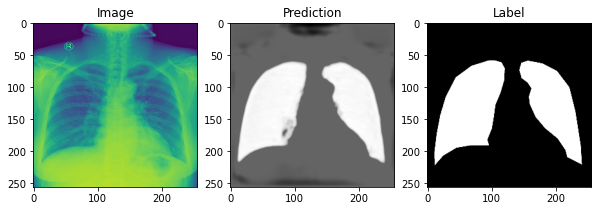

 21%|██        | 21/100 [03:13<12:07,  9.21s/it]

True v/s Pred:
0	0.011
0	0.021
0	0.003
0	0.014
0	0.05
0	0.002
0	0.055
0	0.111
1	0.956
0	0.044
0	0.046
0	0.011
0	0.009
0	0.002
0	0.045
[TRAIN] Epoch : 20, Loss : -0.63065


In [ ]:
# train model
loss_list = []
for epoch in tqdm(range(num_epochs)):
    model.train()

    for data in dataAll["Train"]:
        X = data['cxr'].to(device).type(torch.float)

        Y_class = data['Y'].to(device)
        Y_seg = data['gaze'].to(device).type(torch.float)

        optimizer.zero_grad()
        Y_class_pred, Y_seg_pred = model(X)
        
        loss = classification_loss(Y_class_pred.type(torch.float), Y_class.type(torch.float)) + seg_pred_loss(Y_seg_pred.type(torch.float), Y_seg.type(torch.float))
        loss.backward()

        optimizer.step()
        loss_list.append(loss.detach().clone().cpu())
                
    visualize(data, Y_seg_pred, Y_class_pred)
    
    print("[TRAIN] Epoch : %d, Loss : %2.5f" % (epoch, np.mean(loss_list)))
#     if (epoch + 1) % val_check == 0:
    

#         cur_loss = validation(model, val_dataloader)
#         print("[VALIDATION] Epoch : %d, Loss : %2.5f" % (epoch, cur_loss))
#         if cur_loss < best_loss:
#             best_loss = cur_loss
#             torch.save(model.state_dict(), os.path.join("seg", model_path)) 